In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [16]:
# Load dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

In [17]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [18]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Kernel: LINEAR
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         4
     class_1       1.00      1.00      1.00         1
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



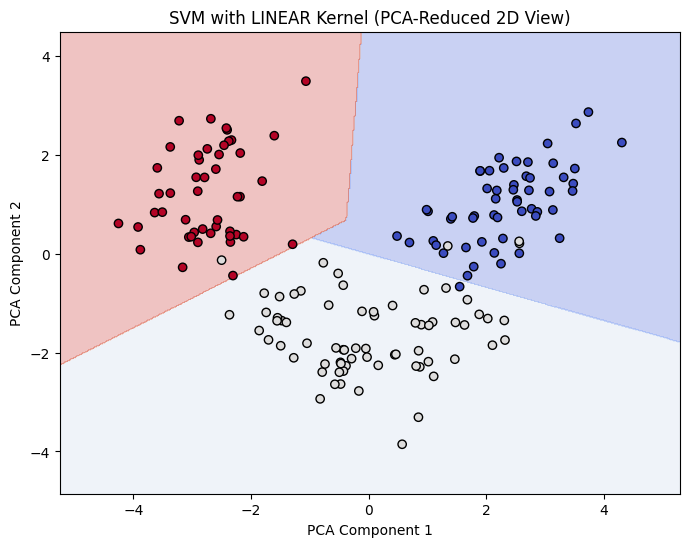

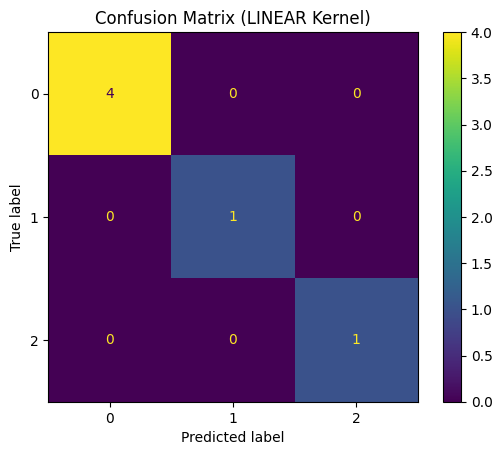

Kernel: POLY
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         4
     class_1       1.00      1.00      1.00         1
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



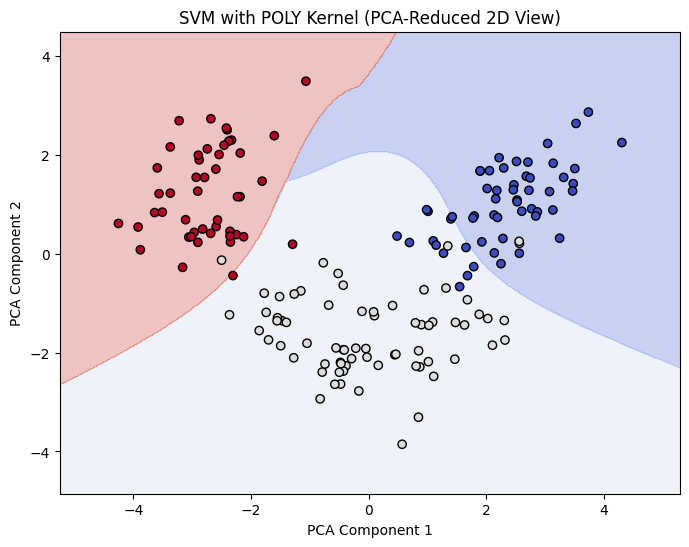

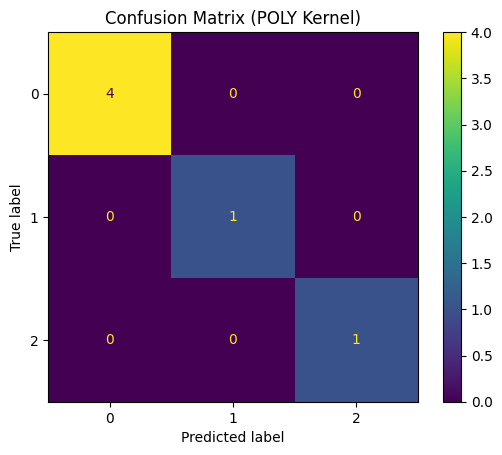

Kernel: RBF
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         4
     class_1       1.00      1.00      1.00         1
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



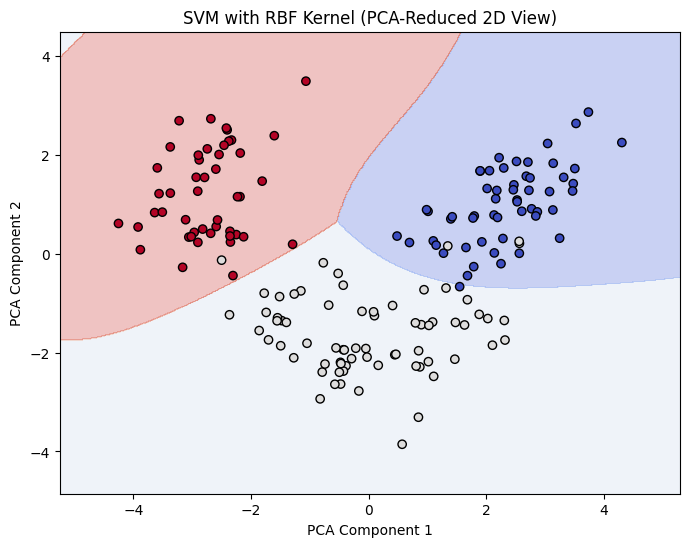

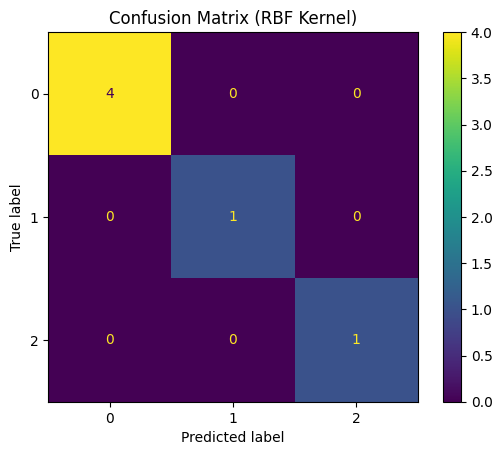

In [19]:
# Kernels to test
kernels = ["linear", "poly", "rbf"]

for kernel in kernels:
    print(f"Kernel: {kernel.upper()}")
    
    # Train SVM on full data
    model = SVC(kernel=kernel, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # PCA for visualization
    pca = PCA(n_components=2)
    X_train_2D = pca.fit_transform(X_train)
    X_test_2D = pca.transform(X_test)
    
    # Train 2D SVM for plotting
    model_2D = SVC(kernel=kernel, gamma='scale', random_state=42)
    model_2D.fit(X_train_2D, y_train)
    
    # Create meshgrid for contour plot
    h = 0.02
    x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
    y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict over the grid
    Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM with {kernel.upper()} Kernel (PCA-Reduced 2D View)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Confusion Matrix ({kernel.upper()} Kernel)")
    plt.show()
